In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
dnames=['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','REACTOME','CGP','BIOCARTA']
bname='progeny'
atype='_abs'
rtype='_filtered'

In [3]:
delta={}
for dname1 in dnames:
    delta[dname1]=[]
    for dname2 in list(set(dnames)-set([dname1])):
        score=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname1,rtype,atype),
                      sep=',',header=0,index_col=0).abs().max()
        score_1minus2=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s%s_minus_%s%s%s.csv' % (bname,dname1,rtype,dname2,rtype,atype),
                                     sep=',',header=0,index_col=0).abs().max()
        if dname1<dname2:
            score=score[pd.Series(score_1minus2.index).apply(lambda x:x.split('*')[0]).values]
        else:
            score=score[pd.Series(score_1minus2.index).apply(lambda x:x.split('*')[1]).values]
        delta[dname1]+=list(score_1minus2.values-score.values)
delta_df=pd.DataFrame(columns=['Data','Delta'])
for dname in delta:
    temp=pd.DataFrame(columns=delta_df.columns)
    temp['Delta']=delta[dname]
    temp['Data']=dname
    delta_df=pd.concat([delta_df,temp])
fil=delta_df['Delta'].abs()<2
delta_df=delta_df[fil]

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


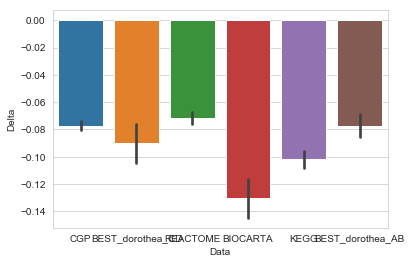

In [4]:
sns.barplot(x='Data',y='Delta',data=delta_df)

In [5]:
model=smf.ols('Delta ~ Data',data=delta_df).fit()

In [6]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Data,5.0,43.346225,8.669245,35.979324,5.930465e-37
Residual,150453.0,36251.762385,0.240951,NaN,NaN


In [7]:
model.pvalues

Intercept                   1.755653e-55
Data[T.BEST_dorothea_CD]    1.462425e-01
Data[T.BIOCARTA]            3.637553e-15
Data[T.CGP]                 9.771311e-01
Data[T.KEGG]                3.071182e-05
Data[T.REACTOME]            2.696825e-01
dtype: float64

In [8]:
model.params

Intercept                  -0.077514
Data[T.BEST_dorothea_CD]   -0.012183
Data[T.BIOCARTA]           -0.052691
Data[T.CGP]                 0.000155
Data[T.KEGG]               -0.024462
Data[T.REACTOME]            0.005971
dtype: float64

In [9]:
delta={}
for dname1 in dnames:
    delta[dname1]=[]
    for dname2 in list(set(dnames)-set([dname1])):
        score=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname2,rtype,atype),
                      sep=',',header=0,index_col=0).abs().max()
        score_2minus1=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s%s_minus_%s%s%s.csv' % (bname,dname2,rtype,dname1,rtype,atype),
                                     sep=',',header=0,index_col=0).abs().max()
        if dname2<dname1:
            score=score[pd.Series(score_2minus1.index).apply(lambda x:x.split('*')[0]).values]
        else:
            score=score[pd.Series(score_2minus1.index).apply(lambda x:x.split('*')[1]).values]
        delta[dname1]+=list(score_2minus1.values-score.values)
delta_df=pd.DataFrame(columns=['Data','Delta'])
for dname in delta:
    temp=pd.DataFrame(columns=delta_df.columns)
    temp['Delta']=delta[dname]
    temp['Data']=dname
    delta_df=pd.concat([delta_df,temp])
fil=delta_df['Delta'].abs()<2
delta_df=delta_df[fil]

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


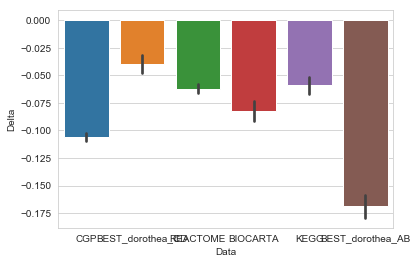

In [10]:
sns.barplot(x='Data',y='Delta',data=delta_df)

In [11]:
model=smf.ols('Delta ~ Data',data=delta_df).fit()

In [12]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Data,5.0,141.858054,28.371611,118.069438,4.362404e-125
Residual,150453.0,36153.250555,0.240296,NaN,NaN


In [13]:
model.pvalues

Intercept                   5.209275e-250
Data[T.BEST_dorothea_CD]     5.196359e-54
Data[T.BIOCARTA]             3.942672e-39
Data[T.CGP]                  1.577791e-30
Data[T.KEGG]                 8.315070e-76
Data[T.REACTOME]             7.462958e-85
dtype: float64

In [14]:
model.params

Intercept                  -0.168598
Data[T.BEST_dorothea_CD]    0.129032
Data[T.BIOCARTA]            0.086329
Data[T.CGP]                 0.062574
Data[T.KEGG]                0.109516
Data[T.REACTOME]            0.106338
dtype: float64

In [10]:
results=pd.DataFrame(columns=['Database','Geneset','Size'])
for db in ['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','REACTOME','CGP','BIOCARTA']:
    data=pd.read_csv('../results/genesets/single/csvs/%s_filtered.csv' % db,
                sep=',',header=0,index_col=0)
    data=data['Set'].value_counts()
    results_temp=pd.DataFrame(index=range(len(data)),columns=results.columns)
    results_temp['Database']=db; results_temp['Geneset']=data.index; results_temp['Size']=data.values
    results=pd.concat([results,results_temp],0)
results['Size']=results['Size'].astype(float)

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


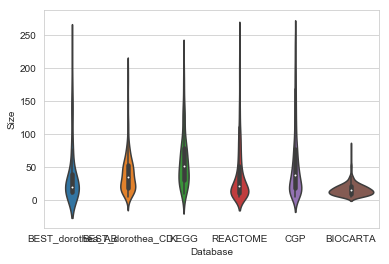

In [11]:
sns.violinplot(x='Database',y='Size',data=results)

In [12]:
data=pd.read_csv('../results/benchmark/rocaucs/gdsc/single/BEST_dorothea_AB_filtered.csv',sep=',',header=0,
                index_col=0)

In [15]:
data['AR']

Index(['AR', 'ARNTL', 'ATF1', 'ATF2', 'ATF4', 'BACH1', 'CDX2', 'CEBPA',
       'CEBPB', 'CEBPD',
       ...
       'TFDP1', 'TP63', 'TWIST1', 'USF1', 'USF2', 'VDR', 'WT1', 'YY1',
       'ZBTB33', 'ZEB1'],
      dtype='object', length=109)

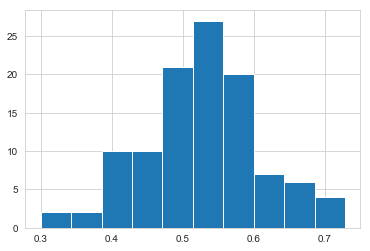

In [33]:
data.loc['VHL_mut'].sort_values().hist()

In [24]:
data.index

Index(['ACVR2A_mut', 'AKAP9_mut', 'ALK_mut', 'ANK3_mut', 'APC_mut',
       'ARFGEF1_mut', 'ARHGAP29_mut', 'ARID1A_mut', 'ARID2_mut', 'ARID4A_mut',
       'ARID4B_mut', 'ASH1L_mut', 'ASPM_mut', 'ASXL1_mut', 'ATM_mut',
       'ATR_mut', 'B2M_mut', 'BAP1_mut', 'BCOR_mut', 'BMPR2_mut', 'BPTF_mut',
       'BRAF_mut', 'BRCA1_mut', 'BRCA2_mut', 'BRWD1_mut', 'CASP8_mut',
       'CDH1_mut', 'CDKN2A_mut', 'CEP290_mut', 'CHD8_mut', 'CHD9_mut',
       'CIC_mut', 'CREBBP_mut', 'CTCF_mut', 'CTNNB1_mut', 'DNMT3A_mut',
       'EGFR_mut', 'EP300_mut', 'EZH2_mut', 'F8_mut', 'FAT1_mut', 'FAT2_mut',
       'FBXW7_mut', 'INPPL1_mut', 'KALRN_mut', 'KDM6A_mut', 'KRAS_mut',
       'LAMA2_mut', 'LPHN2_mut', 'LRPPRC_mut', 'MACF1_mut', 'MAGI2_mut',
       'MECOM_mut', 'MGA_mut', 'MLH1_mut', 'MLL_mut', 'MLL2_mut', 'MLL3_mut',
       'MLLT4_mut', 'MYH11_mut', 'MYH9_mut', 'NCOR1_mut', 'NCOR2_mut',
       'NF1_mut', 'NF2_mut', 'NOTCH1_mut', 'NRAS_mut', 'NSD1_mut', 'PBRM1_mut',
       'PIK3CA_mut', 'PIK3R1_mut', 'PTC